### Tarea 5

Librerias

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import random
import os, shutil
import warnings
warnings.filterwarnings('ignore')

In [3]:
Categorias = os.listdir('./Vegetable Images/train')

In [5]:
ruta_entrenamiento = "./Vegetable Images/train"
ruta_validacion = "./Vegetable Images/validation"
ruta_test = "./Vegetable Images/test"

Gráficar algunas imagenes de manera aleatoria

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x2D2A7F43220>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x2D2A8156A00>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x2D2A7FDFBB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x2D2A6959460>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x2D2A69000A0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x2D2A7E3B460>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x2D2A7EE6D30>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x2D2A6A35640>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x2D2A7E403A0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x2D2A7C49EE0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x2D2A7E95460>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x2D2A69CF4C0>
<PIL.JpegImagePlugin.JpegIma

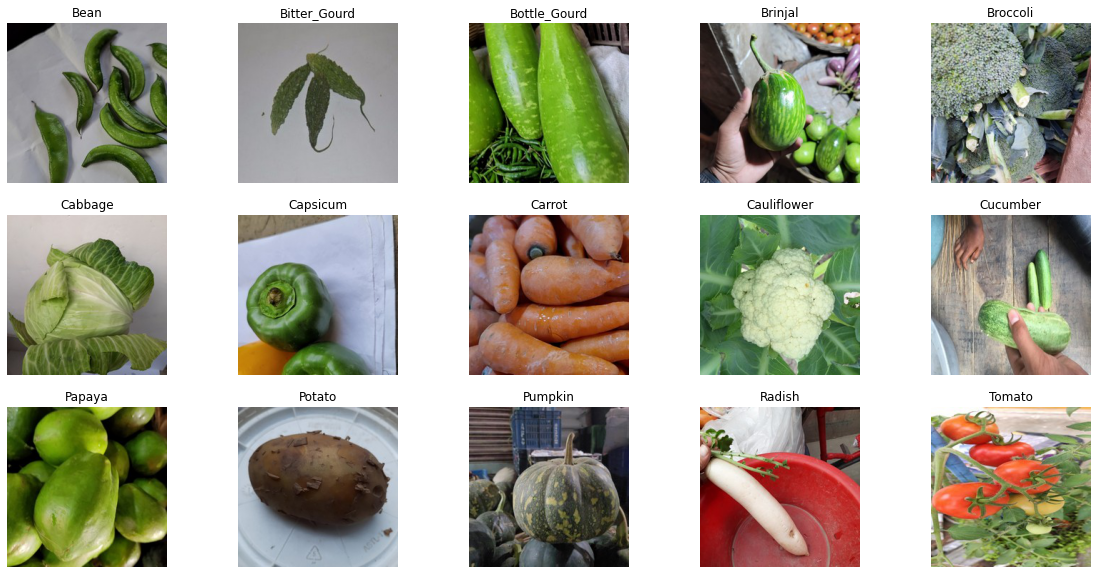

In [19]:
def Imagenes(Categorias):
    plt.figure(figsize=(20, 10))
    for i, categoria in enumerate(Categorias):
        ruta_imagen = ruta_entrenamiento + '/' + categoria
        nombre_imagenes = os.listdir(ruta_imagen)
        numero_imagenes = len(nombre_imagenes)
        imagen_aleatoria= nombre_imagenes[random.randint(0,numero_imagenes-1)]
        ruta_imagen_aleatoria = ruta_imagen + '/' + imagen_aleatoria
        imagen = image.load_img(ruta_imagen_aleatoria)
        imagen_arr = image.img_to_array(imagen)/255.0
        print(imagen)
        
        # Create Subplot and plot the images
        plt.subplot(3, 5, i+1)
        plt.imshow(imagen_arr)
        plt.title(categoria)
        plt.axis('off')
        
    plt.show()

# Call the function
Imagenes(Categorias)

In [22]:

# 1. Entrenamiento
entrenamiento_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
entrenamiento_generator = entrenamiento_gen.flow_from_directory(ruta_entrenamiento,target_size=(224, 224),batch_size=32,class_mode='categorical')

# 2. Validation Set
validacion_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
validacion_generator =entrenamiento_gen.flow_from_directory(ruta_validacion,target_size=(224, 224),batch_size=32,class_mode='categorical')

# 3. Test Set
test_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
test_image_generator = entrenamiento_gen.flow_from_directory(ruta_validacion,target_size=(224, 224),batch_size=32,class_mode='categorical')


Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


(32, 224, 224, 3)


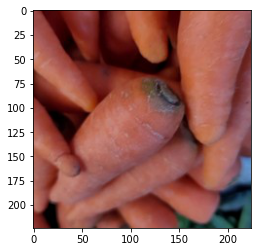

In [26]:
for _ in range(1):
    img, label = test_image_generator.next()
    print(img.shape) 
    plt.imshow(img[0])
    plt.show()

In [27]:
#Construir Red
model = Sequential() # model object
# Add Layers
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[224, 224, 3]))
model.add(MaxPooling2D(2, ))
#model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
#model.add(MaxPooling2D(2))
model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dense(15, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 32)                6422560   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                        

In [28]:
early_stopping = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
hist = model.fit(entrenamiento_generator, 
                 epochs=100, 
                 verbose=1, 
                 validation_data=validacion_generator, 
                 steps_per_epoch = 15000//32, 
                 validation_steps = 3000//32, 
                 callbacks=early_stopping)

Epoch 1/100
390/468 [========================>.....] - ETA: 1:19 - loss: 2.7520 - accuracy: 0.0642

KeyboardInterrupt: 